In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
IMG_SIZE=224
BATCH_SIZE=32

In [26]:
#creating training data parameters
train_datagen = ImageDataGenerator(rescale=1./225,validation_split=0.2)

In [27]:
train_generator=train_datagen.flow_from_directory('/content/drive/MyDrive/brain_tumor_dataset/Train',
target_size=(IMG_SIZE, IMG_SIZE),
batch_size=BATCH_SIZE,
class_mode='binary',
subset='training'
)

Found 935 images belonging to 2 classes.


In [28]:
val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/brain_tumor_dataset/Train',
    target_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 232 images belonging to 2 classes.


In [29]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=BATCH_SIZE)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.5553 - loss: 0.8320 - val_accuracy: 0.7069 - val_loss: 0.5483
Epoch 2/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.8010 - loss: 0.4304 - val_accuracy: 0.8060 - val_loss: 0.4421
Epoch 3/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 204ms/step - accuracy: 0.8626 - loss: 0.3091 - val_accuracy: 0.8190 - val_loss: 0.3803
Epoch 4/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.9190 - loss: 0.2022 - val_accuracy: 0.8405 - val_loss: 0.3503
Epoch 5/5
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.9514 - loss: 0.1236 - val_accuracy: 0.8879 - val_loss: 0.2494


In [32]:
model.save('/content/drive/MyDrive/brain_tumor_dataset/braintumor.h5')

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt #visualization
import numpy as np
model=load_model('/content/drive/MyDrive/brain_tumor_dataset/braintumor.h5')
print("Model Loaded")

Model Loaded


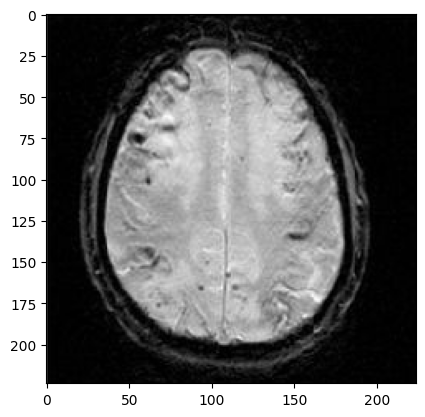

In [34]:
test_image_path="/content/drive/MyDrive/brain_tumor_dataset/Train/no/N1430.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [35]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /=255

In [36]:
prediction=model.predict(img_array)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 825ms/step
[[0.14154355]]


In [37]:
if prediction >=0.5:
  print("You have Brain Tumor")
else:
  print("You have no Brain Tumor")

You have no Brain Tumor
